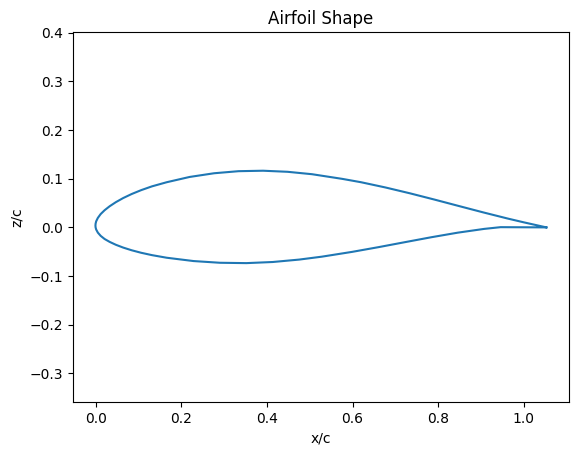

In [119]:
import numpy as np
import matplotlib.pyplot as plt
open_file = open('AERO-307_Section901_NACA633418_140um03.txt')
data = open_file.readlines()
alpha_values = data[0].split('\t')
alpha_values = alpha_values[2:]
q = data[2].split('\t')
q = q[2:]
q_list = []
alpha_list = []
for i in alpha_values:
    alpha_list.append(float(i))
for i in q:
    q_list.append(float(i))
x_positions = np.loadtxt('AERO-307_Section901_NACA633418_140um03.txt', skiprows=5,usecols=(0))
z_positions = np.loadtxt('AERO-307_Section901_NACA633418_140um03.txt', skiprows=5,usecols=(1))
c = x_positions[len(x_positions)-1]
x_c = []
for i in x_positions:
    x_c.append(i/c)
x_c.append(x_c[0])
z_c = []
for i in z_positions:
    z_c.append(i/c)
z_c.append(z_c[0])
# creating massive array to act as a dictionary and keeping each pressure list seperate
iteration_counter = 0
def get_P_name(alpha_value):
    i = int(alpha_value)
    if i < 0:
        i = 'Neg' + str(abs(i))
    return 'AOA_' + str(i)
for i in alpha_list:
    globals()[get_P_name(i)] = []
    for j in range(len(np.loadtxt('AERO-307_Section901_NACA633418_140um03.txt', skiprows=5,usecols=(iteration_counter+2)))):
        globals()[get_P_name(i)].append(np.loadtxt('AERO-307_Section901_NACA633418_140um03.txt', skiprows=5,usecols=(iteration_counter+2))[j])
    globals()[get_P_name(i)].append(np.loadtxt('AERO-307_Section901_NACA633418_140um03.txt', skiprows=5,usecols=(iteration_counter+2))[0])
    iteration_counter += 1
P_matrix = np.zeros((len(x_positions),len(alpha_list)))
P_matrix = np.array([AOA_Neg4,AOA_Neg3,AOA_Neg2,AOA_Neg1,AOA_0,AOA_1,AOA_2,AOA_3,AOA_4,AOA_5,AOA_6,AOA_7,AOA_8,AOA_9,AOA_10,AOA_11])
def Cp(P_list_row_number):
    P_infty = max(P_matrix[P_list_row_number]) - q_list[P_list_row_number]
    pressure_coefficient = []
    for i in range(len(P_matrix[P_list_row_number])):
        pressure_coefficient.append((P_matrix[P_list_row_number][i] - P_infty) / q_list[P_list_row_number])
    return pressure_coefficient
def Cp_graph(alpha_value):
    plt.plot(x_c,Cp(alpha_value+4))
    plt.ylabel('Cp')
    plt.xlabel('x/c')
    plt.title(get_P_name(alpha_value))
    plt.gca().invert_yaxis()
    plt.margins(y=1)
    plt.show()
    return None
plt.plot(x_c,z_c)
plt.title("Airfoil Shape")
plt.margins(y=1.5)
plt.xlabel('x/c')
plt.ylabel('z/c')
plt.show()
def Cl(alpha_value):
    return -1* np.trapz(Cp(alpha_value+4),x_c,1/len(x_c))

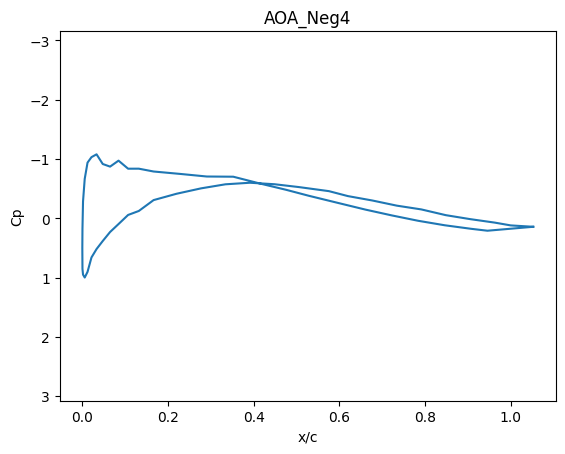

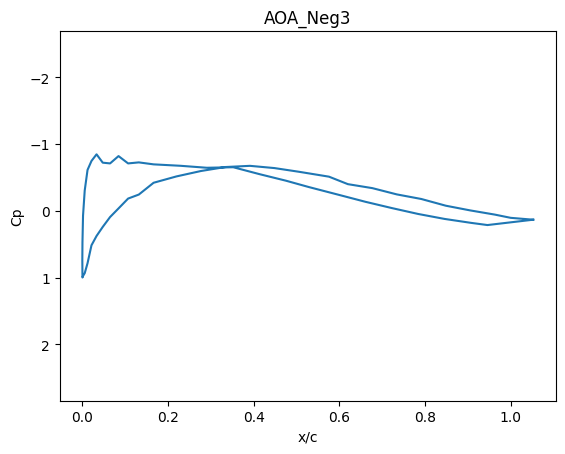

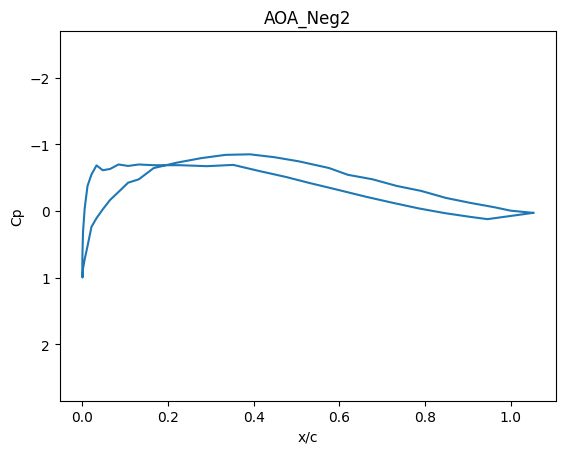

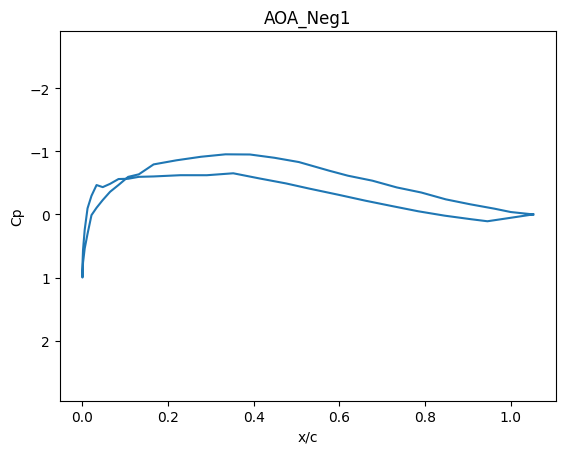

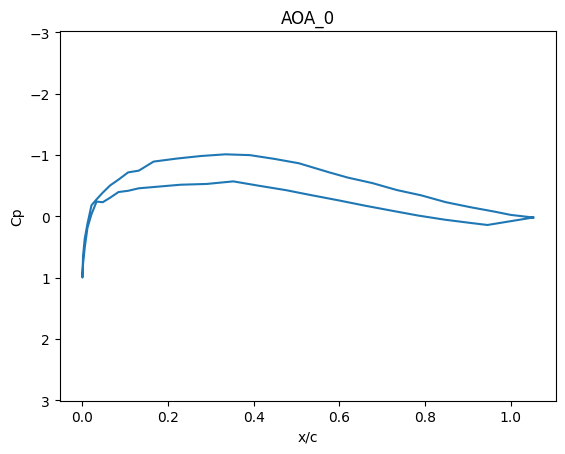

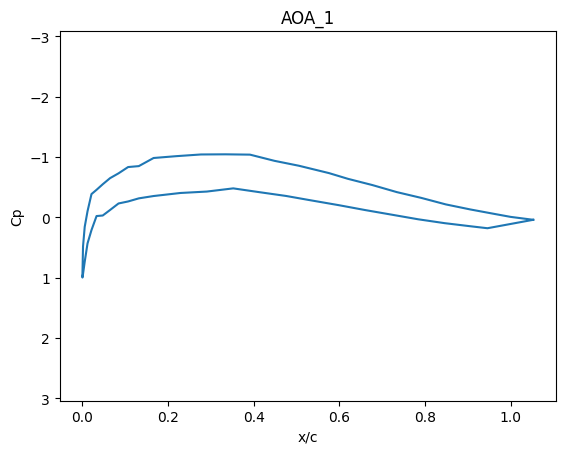

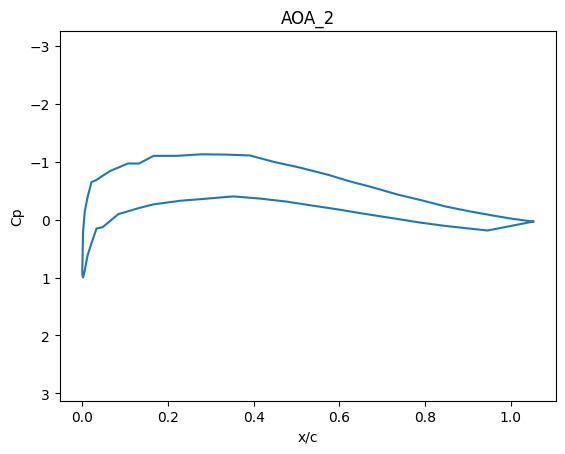

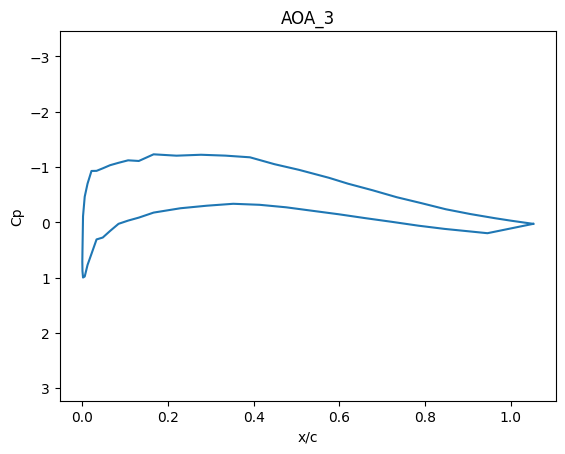

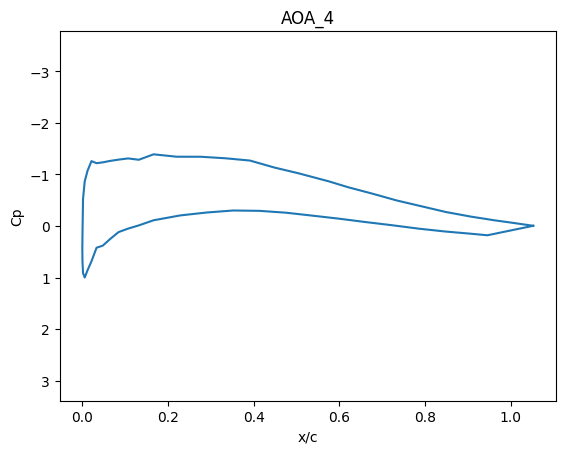

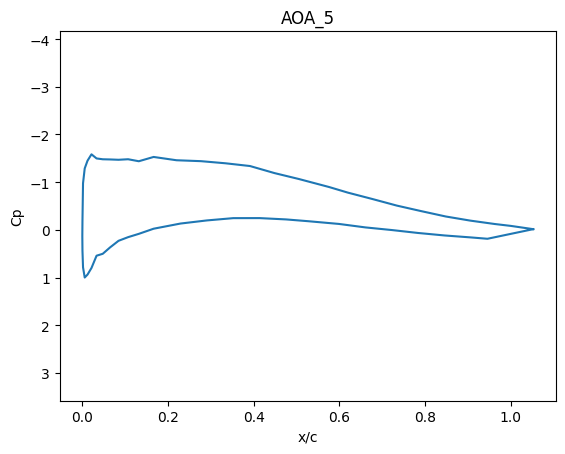

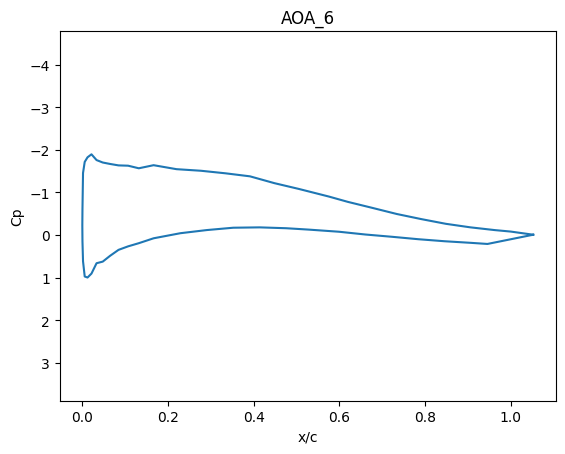

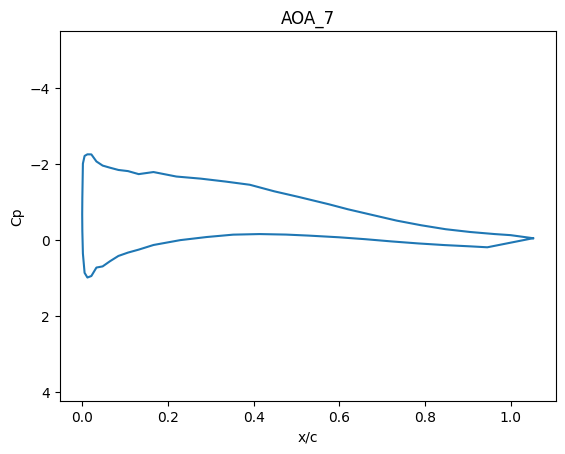

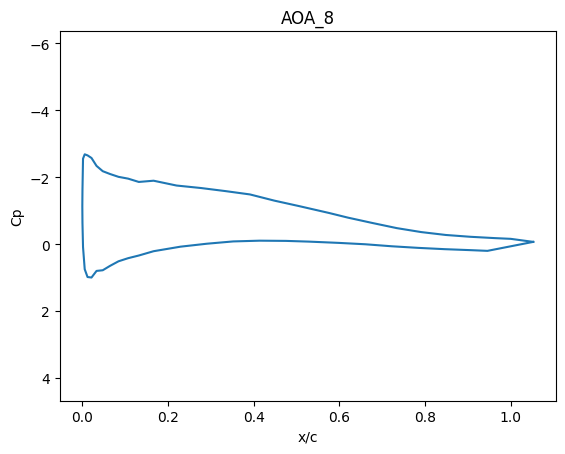

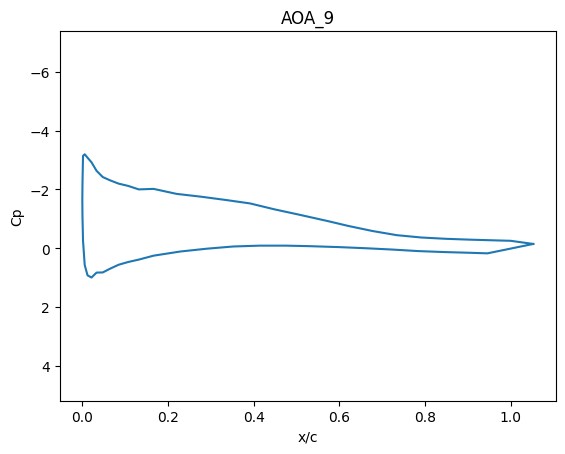

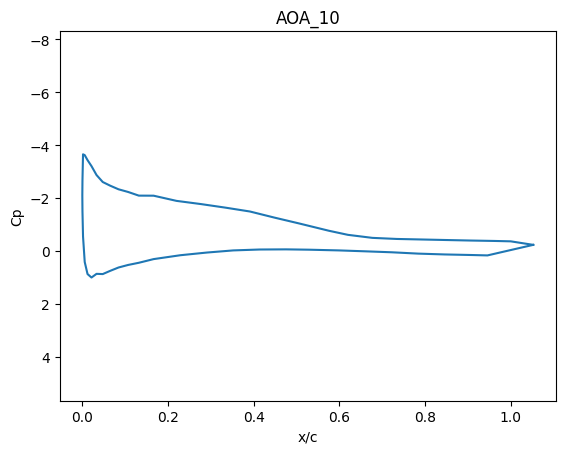

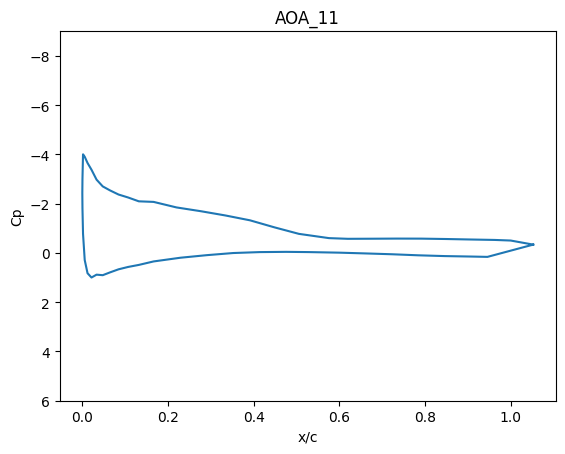

In [120]:
Cl_alpha = []
for i in alpha_list:
    Cl_alpha.append(Cl(int(i)))
    Cp_graph(int(i))

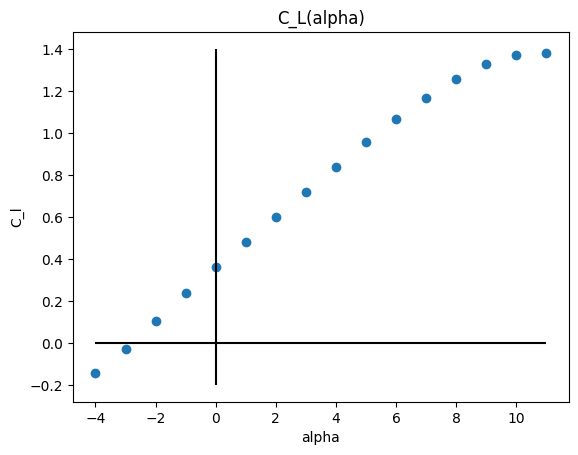

In [121]:
plt.scatter(alpha_list,Cl_alpha)
plt.title('C_L(alpha)')
plt.hlines(y=0,xmin=-4,xmax=11,colors='black')
plt.vlines(x=0,ymin=-.2,ymax=1.4,colors='black')
plt.xlabel('alpha')
plt.ylabel('C_l')
plt.show()

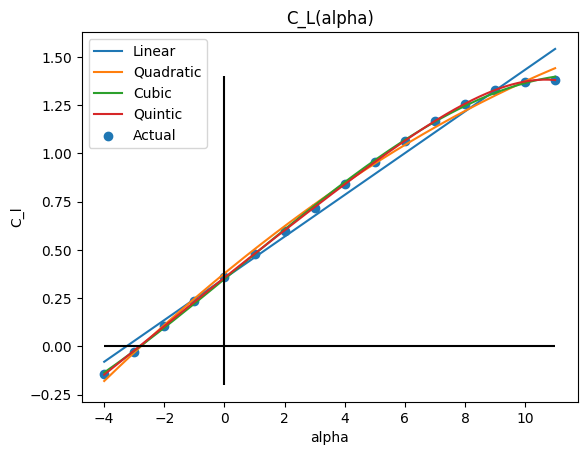

Alpha=0:
Experimental = 0.3606
linear = 0.3525
quadratic = 0.3781
cubic = 0.349
quintic = 0.356


In [122]:
from numpy.polynomial import polynomial as P
lc, stats = P.polyfit(alpha_list,Cl_alpha,1,full=True)
q , stats = P.polyfit(alpha_list,Cl_alpha,2,full=True)
cc, stats = P.polyfit(alpha_list,Cl_alpha,3,full=True)
qc, stats = P.polyfit(alpha_list,Cl_alpha,5,full=True)
linear_estimate = lambda x: lc[0] + lc[1]*x
quadratic_estimate = lambda x: q[0] + q[1]*x + q[2]*x**2
cubic_estimate = lambda x:cc[0] +cc[1]*x +cc[2]*x**2 + cc[3]*x**3
fifth_degree_estimate = lambda x: qc[0] + qc[1]*x + qc[2]*x**2 + qc[3]*x**3 + qc[4]*x**4 + qc[5]*x**5
x_values = np.linspace(-4,11,1000)
plt.plot(x_values,linear_estimate(x_values),label='Linear')
plt.plot(x_values,quadratic_estimate(x_values),label='Quadratic')
plt.plot(x_values,cubic_estimate(x_values),label='Cubic')
plt.plot(x_values,fifth_degree_estimate(x_values),label='Quintic')
plt.scatter(alpha_list,Cl_alpha,label='Actual')
plt.title('C_L(alpha)')
plt.hlines(y=0,xmin=-4,xmax=11,colors='black')
plt.vlines(x=0,ymin=-.2,ymax=1.4,colors='black')
plt.xlabel('alpha')
plt.ylabel('C_l')
plt.legend()
plt.show()
alpha_zero = [round(Cl_alpha[4],4),round(lc[0],4),round(q[0],4),round(cc[0],4),round(qc[0],4)]
print('Alpha=0:')
print('Experimental =',alpha_zero[0])
print('linear =',alpha_zero[1])
print('quadratic =',alpha_zero[2])
print('cubic =',alpha_zero[3])
print('quintic =',alpha_zero[4])

In [123]:
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate
import numpy as np
import matplotlib.pyplot as plt
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
x = symbols('x')
linear_sp = lc[0] + lc[1]*x
quadratic_sp = q[0] + q[1]*x + q[2]*x**2
cubic_sp = cc[0] +cc[1]*x +cc[2]*x**2 + cc[3]*x**3
quintic_sp = qc[0] + qc[1]*x + qc[2]*x**2 + qc[3]*x**3 + qc[4]*x**4 + qc[5]*x**5
def alpha_zero_lift(equation):
    solution = sp.solve(equation, x)
    return solution
displayEquations('linear_sol',alpha_zero_lift(linear_sp))
displayEquations('quad_sol',alpha_zero_lift(quadratic_sp))
displayEquations('cubic_sol',alpha_zero_lift(cubic_sp))
displayEquations('quintic_sol',alpha_zero_lift(quintic_sp))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [124]:
print('Alpha at zero lift:')
print(alpha_zero_lift(linear_sp)[0])
print(alpha_zero_lift(quadratic_sp)[0])
print(alpha_zero_lift(cubic_sp)[1])
print(alpha_zero_lift(quintic_sp)[1])

Alpha at zero lift:
-3.26075739963082
-2.78054626331460
-2.80457534899701 - 0.e-22*I
-2.83183782291370


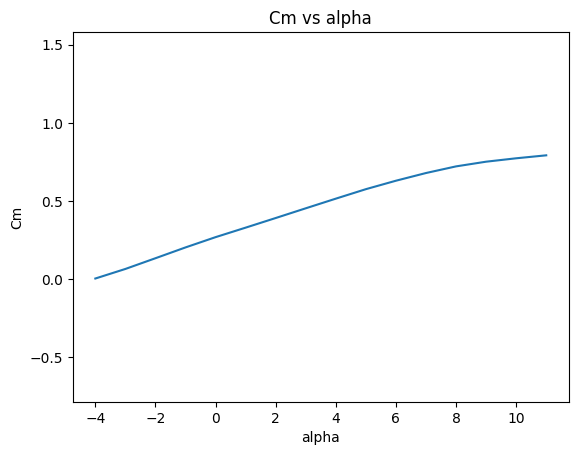

In [125]:
def Cm(alpha):
    alpha = alpha + 4
    C_x = []
    k = 0
    for i in Cp(alpha):
        C_x.append(i * x_c[k])
        k += 1
    c_m = .25 * Cl(alpha-4) - np.trapz(C_x, x_c, 1 / len(Cp(alpha)))
    return c_m
cm_list = []
for a in alpha_list:
    cm_list.append(Cm(int(a)))
plt.plot(alpha_list, cm_list)
plt.title('Cm vs alpha')
plt.xlabel('alpha')
plt.ylabel('Cm')
plt.margins(y=1)